In [1]:
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
import datetime as dt
import numpy as np
import pandas as pd
import os
from matplotlib.pyplot import margins, xticks
from setuptools.command.rotate import rotate


In [2]:

dir_name="C:\\volume_dia\\"
dir= os.listdir(dir_name)

arr_files=[]
for i in dir:
    split=os.path.splitext(i)
    file_name=split[0]
    file_ext=split[1]
    if file_ext==".csv":
        full_name= file_name+file_ext
        arr_files.append(full_name)    
    
print(arr_files)    
    #arr_files[i]=i
#print("arr_files", arr_files)


['EURGBP_PERIOD_D1.csv', 'EURUSD_PERIOD_D1.csv', 'GBPUSD_PERIOD_D1.csv']


In [3]:
# 0 = EURGBP
# 1 = EURUSD
# 2 = GBPUSD
df =pd.read_csv(dir_name+arr_files[0], delimiter="\t", encoding="UTF-16")
print(df.head(3))
df_reset =df.reset_index()
print(df_reset)
#print(full_name)
date_time=df["Time"]
#df = pd.read_csv(file)

         Time     Open     High      Low    Close   Volume
0  2024.10.03  0.83277  0.83723  0.83232  0.83689  10490.0
1  2024.10.02  0.83348  0.83378  0.83202  0.83277  35937.0
2  2024.10.01  0.83244  0.83448  0.83104  0.83348  48262.0
     index        Time     Open     High      Low    Close   Volume
0        0  2024.10.03  0.83277  0.83723  0.83232  0.83689  10490.0
1        1  2024.10.02  0.83348  0.83378  0.83202  0.83277  35937.0
2        2  2024.10.01  0.83244  0.83448  0.83104  0.83348  48262.0
3        3  2024.09.30  0.83455  0.83596  0.83121  0.83244  43321.0
4        4  2024.09.29  0.83418  0.83485  0.83409  0.83455   1802.0
..     ...         ...      ...      ...      ...      ...      ...
375    375  2023.07.21  0.86488  0.86791  0.86334  0.86550  32570.0
376    376  2023.07.20  0.86602  0.86979  0.86476  0.86489  35605.0
377    377  2023.07.19  0.86142  0.87004  0.86124  0.86602  41460.0
378    378  2023.07.18  0.85962  0.86145  0.85762  0.86142  38372.0
379    379  2023

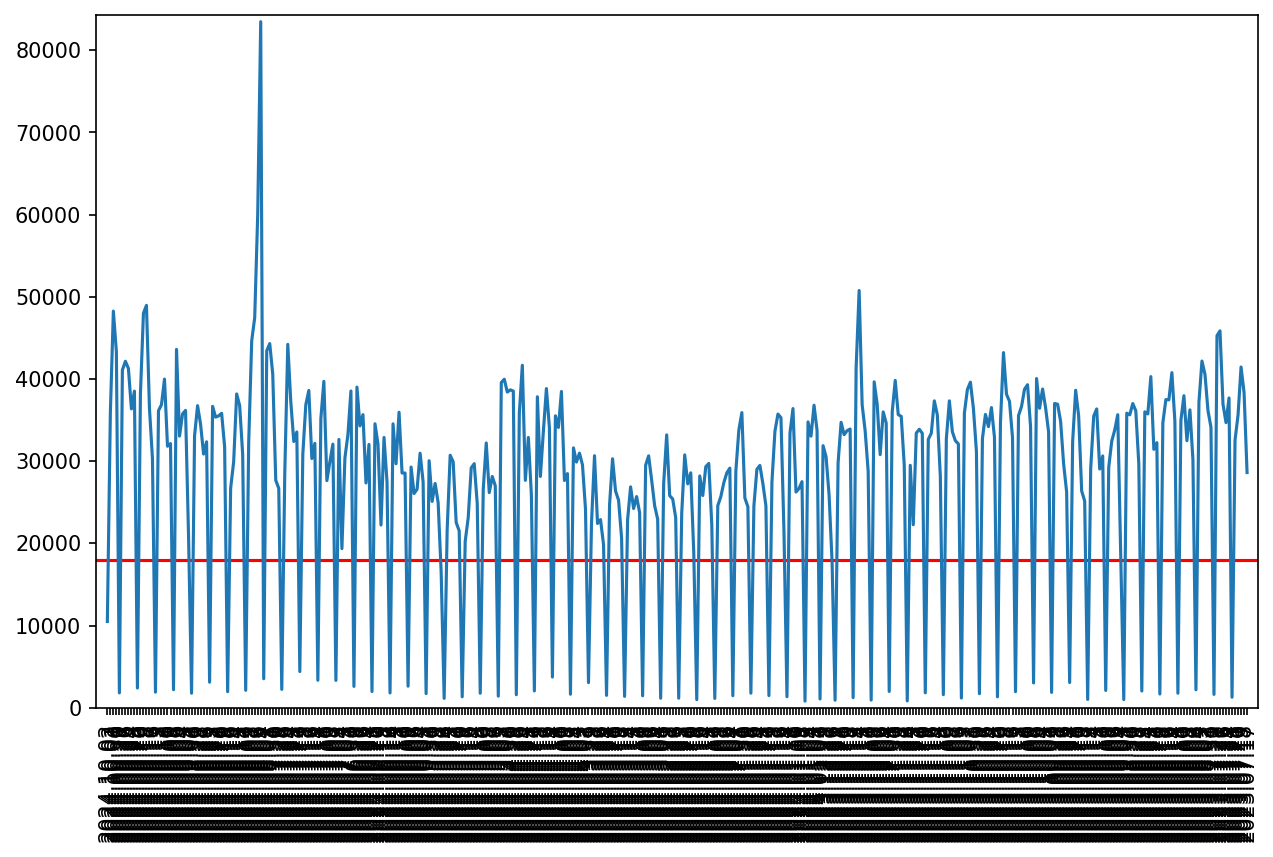

In [4]:
df_datetime = pd.to_datetime(date_time)
filter_year =df_datetime.dt.year>=2024
filter0= df_datetime.dt.month==3
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
limit = 18000

# plt.plot(filter_low_volume["Time"],filter_low_volume["Volume"])
plt.axhline(y=limit, color="r", linestyle="-")
plt.plot(df["Time"],df["Volume"])
plt.margins(.01)

plt.show()


           Time     Open     High      Low    Close   Volume
0    2024.10.03  0.83277  0.83723  0.83232  0.83689  10490.0
4    2024.09.29  0.83418  0.83485  0.83409  0.83455   1802.0
10   2024.09.22  0.83760  0.83833  0.83760  0.83823   2396.0
16   2024.09.15  0.84367  0.84431  0.84357  0.84406   1891.0
22   2024.09.08  0.84370  0.84441  0.84353  0.84424   2192.0
..          ...      ...      ...      ...      ...      ...
350  2023.08.20  0.85249  0.85397  0.85231  0.85346   1665.0
356  2023.08.13  0.86200  0.86245  0.86118  0.86199   1758.0
362  2023.08.06  0.86181  0.86367  0.86125  0.86296   2182.0
368  2023.07.30  0.85669  0.85785  0.85531  0.85757   1618.0
374  2023.07.23  0.86516  0.86587  0.86459  0.86549   1273.0

[66 rows x 6 columns]


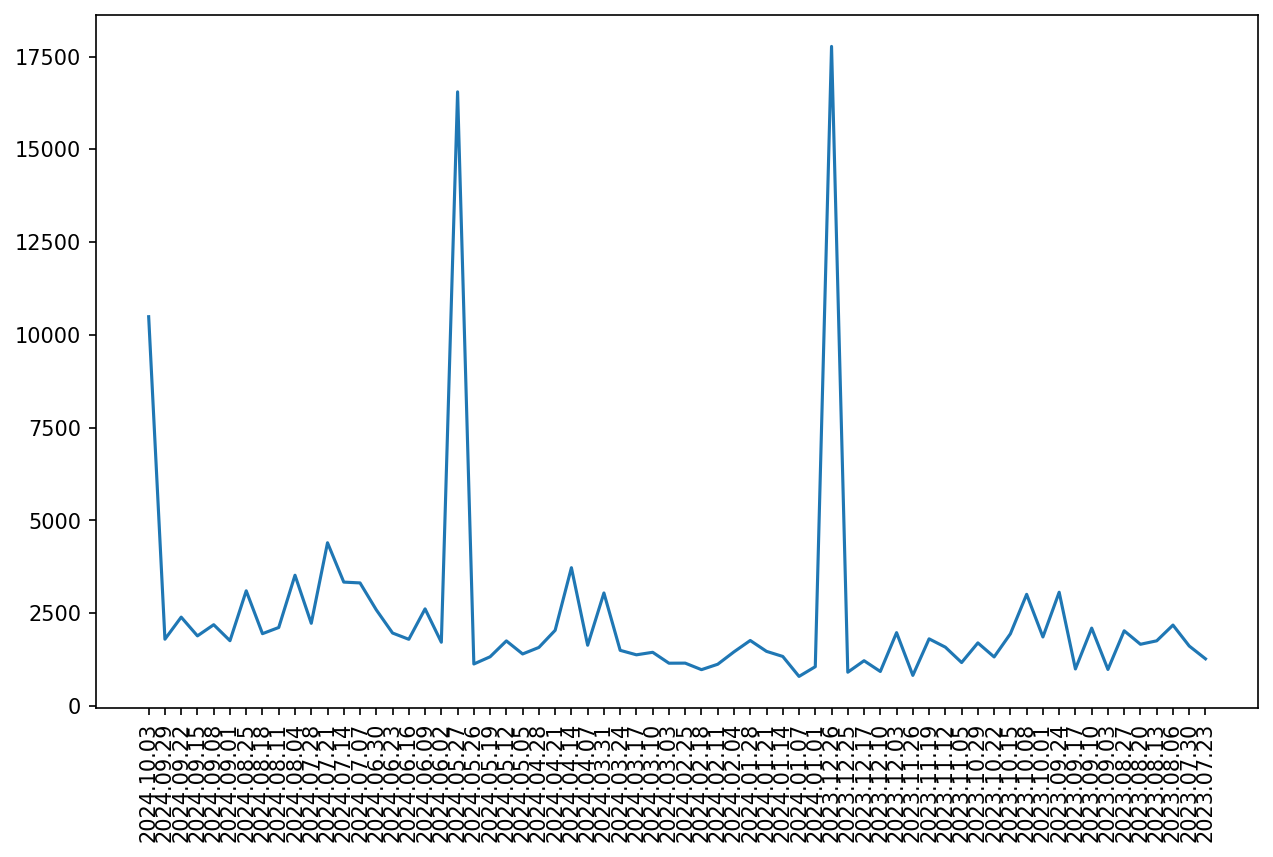

In [5]:
# baixo ocorrer maioritariamente  ao domingo devido, bolsa americana e europeia estar fechada e abertura da bolsa asiatica

limit =18000

filter_low_volume= df[df["Volume"]<limit]
print (filter_low_volume)
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.plot(filter_low_volume["Time"],filter_low_volume["Volume"])
# plt.margins(.01)
# plt.show()

count      312.000000
mean     32625.881410
std       5891.167185
min      18526.000000
25%      28550.750000
50%      32974.000000
75%      36420.500000
max      50770.000000
Name: Volume, dtype: float64

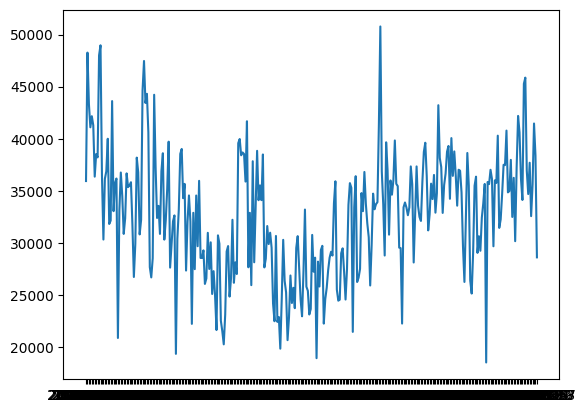

In [6]:
# torna dificil tracar qualquer tipo de relação do volume ao preço de fechamento, já que o volume tende pouco dentro eixo por volta do 33k, com variação de 1 STD (removido outlier e baixo volume), o preço de fecho houve um aumento .03

filter_high_volume= df[df["Volume"]>limit] 
outlier = (df[(df["Volume"]<60000) & (df["Volume"]>limit)])
plt.plot(outlier["Time"],outlier["Volume"])
outlier["Volume"].describe()
# plt.show()


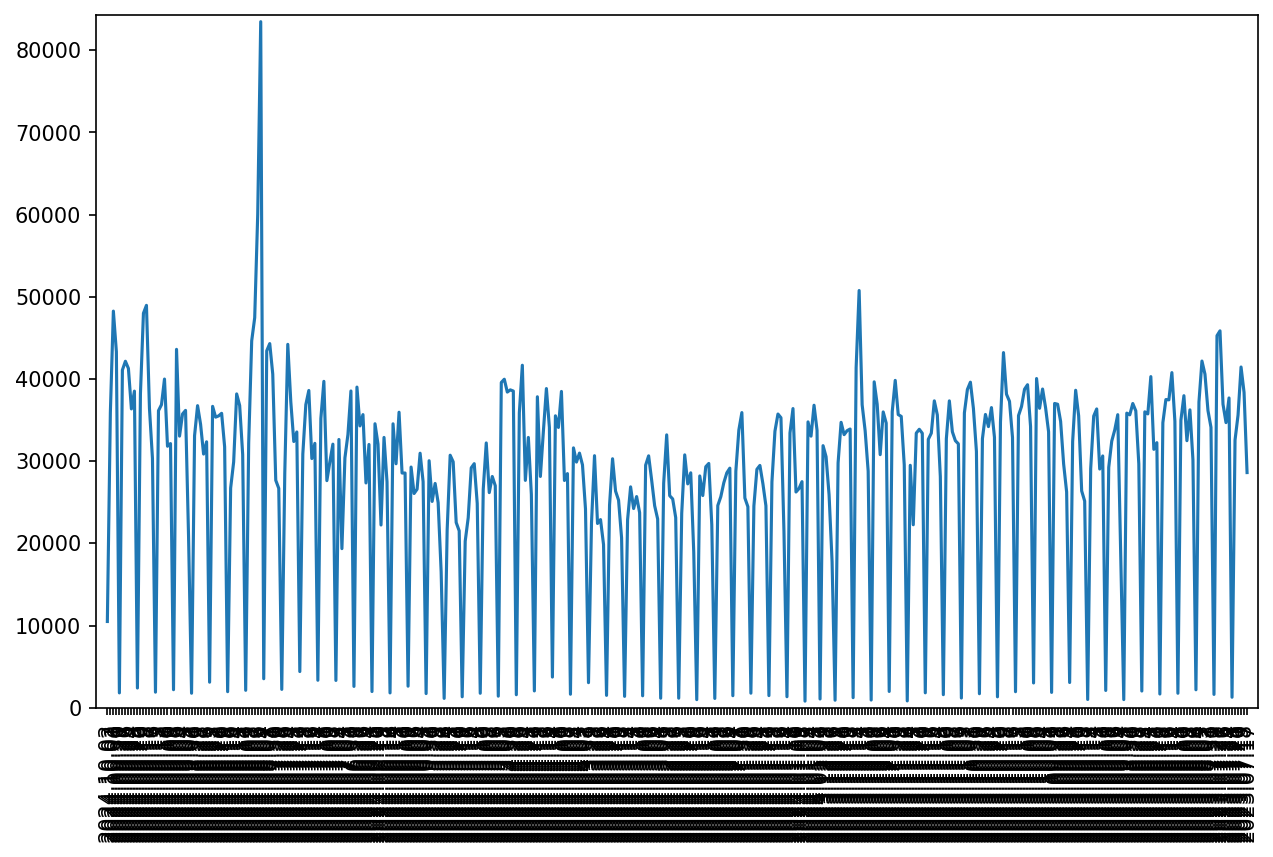

In [7]:
# volume
axis_x = df["Time"]
axis_y = df["Volume"]

plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.margins(.01)
plt.plot(axis_x,axis_y)
plt.show()

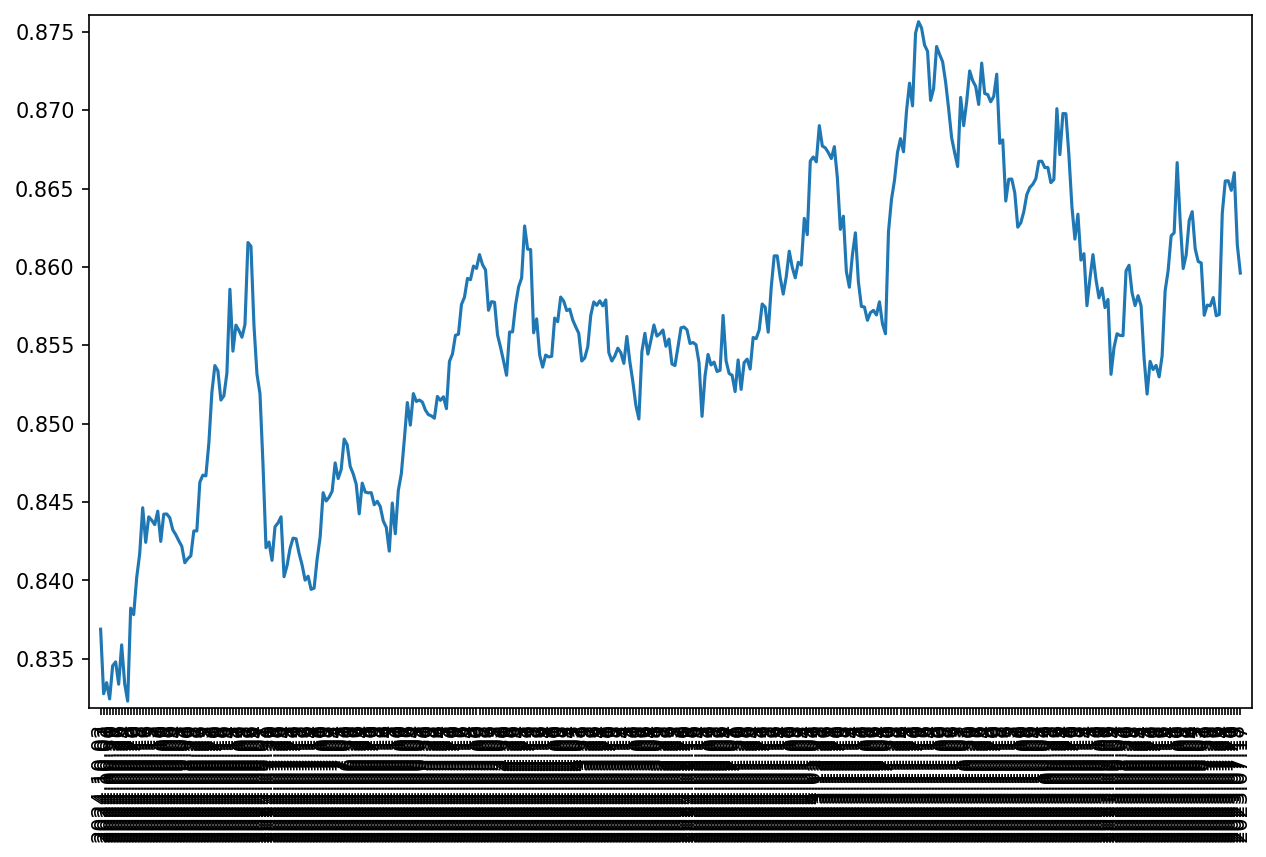

In [8]:
# valor de fecho

axis_x = df["Time"]
axis_y = df["Close"]
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.margins(.01)
plt.plot(axis_x, axis_y)